In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
                                                       '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2'])

# Kolmogorov-Smirnov Test

In [3]:
def model(x, a, b, c):
    return a + b * x + c * x**2

In [4]:
a_real = -3, 2, 2

np.random.seed(42)
x_data = np.random.uniform(-2, 4, 35)
y_errs = np.random.uniform(1, 3, size=len(x_data))
y_data = model(x_data, *a_real) + np.random.normal(0, 1, size=len(x_data)) * y_errs

<Container object of 3 artists>

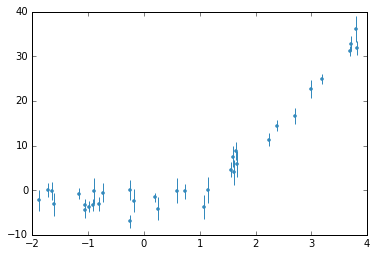

In [5]:
plt.errorbar(x_data, y_data, yerr=y_errs, ls='None', marker='.', capsize=0)

## Primero hagamos el mejor fit

In [6]:
a0 = 1, 1, 1
a_opt, a_covar = curve_fit(model, x_data, y_data, a0, y_errs)

In [7]:
print "a_opt = ", a_opt

a_opt =  [-2.82765572  2.12714236  1.96674052]


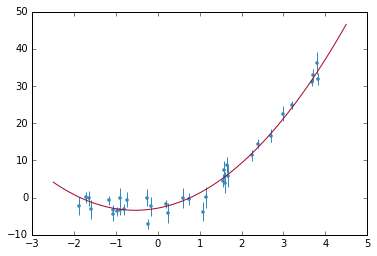

In [8]:
plt.errorbar(x_data, y_data, yerr=y_errs, ls='None', marker='.', capsize=0)
x = np.linspace(-2.5, 4.5, 100)
plt.plot(x, model(x, *a_opt))

## Usemos el K-S test para decidir si el fit es bueno o no.

Primero necesitamos construir la funcion de probabilidad acumulada para el modelo.

In [11]:
xmin = np.min(x_data)
xmax = np.max(x_data)
y_model_sorted = np.sort(model(np.linspace(xmin, xmax, 1000), *a_opt))

In [12]:
y_data_sorted = np.sort(y_data)
CDF_model = np.array([np.sum(y_model_sorted <= yy) for yy in y_data_sorted]) / len(y_model_sorted)

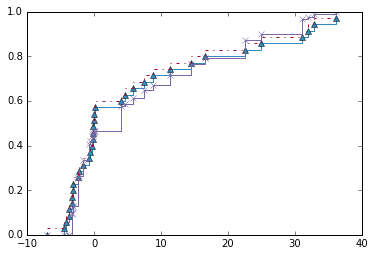

In [13]:
N = len(y_data_sorted)


plt.plot(y_data_sorted, np.arange(N) / N, '-^', drawstyle='steps-post')
plt.plot(y_data_sorted, np.arange(1, N+1) / N, '-.', drawstyle='steps-post')
plt.plot(y_data_sorted, CDF_model, '-x', drawstyle='steps-post')

In [14]:
max1 = np.max(CDF_model - np.arange(N) / N)
max2 = np.max(np.arange(1,N+1)/N - CDF_model)

In [15]:
Dn = max(max1, max2)
print "Dn para nuestro fit = ", Dn

Dn para nuestro fit =  0.142857142857


## Ahora podemos calcular la estadística de Kolmogorov-Smirnov usando `scipy`.

Tendremos que seleccionar un valor para $\alpha$, típicamente se usa $\alpha=0.05$.

In [16]:
from scipy.stats import kstwobign
ks_dist = kstwobign() # two-sided, aproximacion para big N
alpha = 0.05
Dn_critico = ks_dist.ppf(1 - alpha) / np.sqrt(N)
print "Dn_critico = ", Dn_critico

Dn_critico =  0.229560568673


## El nivel de confianza de que nuestra hipotesis es correcta?

In [17]:
print "Confidence level kstwobign()  :", 1 - ks_dist.cdf(Dn * np.sqrt(N))

Confidence level kstwobign()  : 0.472710276009


## `scipy` incluye una fcn de conveniencia para hacer estos calculos.

In [18]:
from scipy.stats import kstest
def cdf(data, model):
    return np.array([np.sum(model <= yy) for yy in data]) / len(model)

Dn_scipy, prob_scipy = kstest(y_data_sorted, cdf, args=(y_model_sorted,))

In [19]:
print "Dn_nuestro : ", Dn
print "Dn_scipy   : ", Dn_scipy

Dn_nuestro :  0.142857142857
Dn_scipy   :  0.142857142857


In [20]:
print "Nivel de confianza : ", prob_scipy

Nivel de confianza :  0.436777823858


En el paso anterior no se usa la aproximacion para N grande por lo que los valores son mejores.